In [95]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [96]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib import cm
from matplotlib import rc
import os, sys

import astropy.constants as const
import astropy.units as u
from astropy.cosmology import z_at_value
from astropy.cosmology import WMAP9 as cosmo
from fractions import Fraction

import hasasia.sensitivity as hassens
import hasasia.sim as hassim

In [57]:
rc('text',usetex=True)
rc('font',**{'family':'serif','serif':['Times New Roman'],'size':14})#,'weight':'bold'})

In [58]:
current_path = os.getcwd()
splt_path = current_path.split("/")
top_path_idx = splt_path.index('DetectorDesignSensitivities')
top_directory = "/".join(splt_path[0:top_path_idx+1])
load_directory = top_directory + '/LoadFiles/InstrumentFiles/'

sys.path.insert(0,top_directory + '/Functions')
import StrainandNoise_v2 as SnN
import SNRcalc_v3 as SnC

LISA_Other_filedirectory = load_directory + 'LISA_Other/StrainFiles/'
LISA_Neil_filedirectory = load_directory + 'LISA_Neil/StrainFiles/'
LISA_ESA_filedirectory = load_directory + 'LISA_ESA/StrainFiles/'
ET_filedirectory = load_directory + 'EinsteinTelescope/StrainFiles/'
aLIGO_filedirectory = load_directory + 'aLIGO/StrainFiles/'
NANOGrav_filedirectory = load_directory + 'NANOGrav/StrainFiles/' 
EOBdiff_filedirectory = top_directory + '/LoadFiles/DiffStrain/EOBdiff/'

In [59]:
fig_save_idx = splt_path.index('Research')
fig_save_location = "/".join(splt_path[0:fig_save_idx+1])
fig_save_location += '/paperfigs'

In [60]:
axissize = 14
labelsize = 16
legendsize = 12
figsize = (10,8)
colornorm = colors.Normalize(vmin=0.0, vmax=5.0)
linesize = 3

####################################################################
# Initialize different instruments

### aLIGO

In [61]:
#aLIGO
aLIGO_filename = 'aLIGODesign.txt'
aLIGO_filelocation = aLIGO_filedirectory + aLIGO_filename

aLIGO = SnN.GroundBased('aLIGO')
aLIGO.Default_Setup(aLIGO_filelocation)

### Einstein Telescope

In [62]:
#Einstein Telescope
ET_filename = 'ET_B_data.txt'
ET_filelocation = ET_filedirectory + ET_filename
ET_data = np.loadtxt(ET_filelocation)

ET = SnN.GroundBased('ET')
ET.Default_Setup(ET_filelocation)

### Plots of Ground Detectors

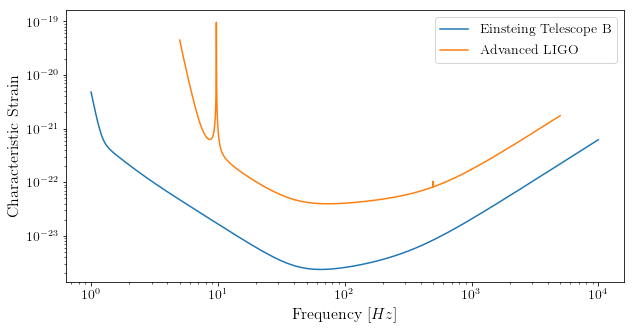

In [63]:
fig = plt.figure(figsize=(10,5))
plt.loglog(ET.fT,ET.h_n_f,label='Einsteing Telescope B')
plt.loglog(aLIGO.fT,aLIGO.h_n_f,label='Advanced LIGO')
plt.xlabel(r'Frequency $[Hz]$',fontsize = labelsize)
plt.ylabel('Characteristic Strain',fontsize = labelsize)
plt.legend()

#########################
#Save Figure to File
figname = '/Ground_Char_Strain.pdf'
figloc = fig_save_location+figname
isitsavetime = False
if isitsavetime:
    fig.savefig(figloc, bbox_inches='tight')
    
plt.show()

### LISA Martin data

In [64]:
#Martin data
LISA_Martin_filename = 'LISA_Allocation_S_h_tot.txt'
LISA_Martin_filelocation = LISA_Other_filedirectory + LISA_Martin_filename

LISA_Martin = SnN.SpaceBased('LISA_Martin')
LISA_Martin.Load_Data(LISA_Martin_filelocation)
LISA_Martin.Get_Strain()

### LISA Neil Cornish data

In [65]:
#Neil Cornish data
LISA_Neil_filename = 'LISA_sensitivity.txt'
LISA_Neil_filelocation = LISA_Neil_filedirectory + LISA_Neil_filename

LISA_Neil = SnN.SpaceBased('LISA_Neil')
LISA_Neil.Load_Data(LISA_Neil_filelocation)
LISA_Neil.Get_Strain()

### LISA Larson Sensitivity Curve

In [66]:
#Larson Sensitivity Curve
LISA_Larson_filename = 'scg_6981.dat'
LISA_Larson_filelocation = LISA_Other_filedirectory + LISA_Larson_filename

LISA_Larson = SnN.SpaceBased('LISA_Larson')
LISA_Larson.Load_Data(LISA_Larson_filelocation)
LISA_Larson.Get_Strain()

### Below is wrong, not strain

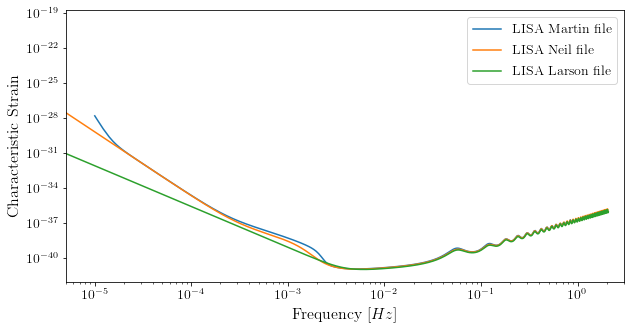

In [67]:
fig = plt.figure(figsize=(10,5))
plt.loglog(LISA_Martin.fT,LISA_Martin.h_n_f,label='LISA Martin file')
plt.loglog(LISA_Neil.fT,LISA_Neil.h_n_f,label='LISA Neil file')
plt.loglog(LISA_Larson.fT,LISA_Larson.h_n_f**2/np.sqrt(LISA_Larson.fT),label='LISA Larson file')
plt.xlabel(r'Frequency $[Hz]$',fontsize = labelsize)
plt.ylabel('Characteristic Strain',fontsize = labelsize)
plt.xlim([5e-6,3])
plt.legend()

#########################
#Save Figure to File
figname = '/Ground_Char_Strain.pdf'
figloc = fig_save_location+figname
isitsavetime = False
if isitsavetime:
    fig.savefig(figloc, bbox_inches='tight')
    
plt.show()

### Numerical Relativity from EOB subtraction

#### Diff0002

In [68]:
diff0002 = SnN.TimeDomain('diff0002')
diff0002.Load_Strain()
diff0002.Get_hf_from_hcross_hplus()

#### Diff0114

In [69]:
diff0114 = SnN.TimeDomain('diff0114')
diff0114.Load_Strain()
diff0114.Get_hf_from_hcross_hplus()

#### Diff0178

In [70]:
diff0178 = SnN.TimeDomain('diff0178')
diff0178.Load_Strain()
diff0178.Get_hf_from_hcross_hplus()

#### Diff0261

In [71]:
diff0261 = SnN.TimeDomain('diff0261')
diff0261.Load_Strain()
diff0261.Get_hf_from_hcross_hplus()

#### Diff0303

In [72]:
diff0303 = SnN.TimeDomain('diff0303')
diff0303.Load_Strain()
diff0303.Get_hf_from_hcross_hplus()

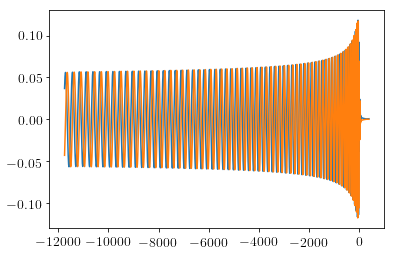

In [73]:
plt.figure()
plt.plot(diff0002.t,diff0002.h_plus_t)
plt.plot(diff0002.t,diff0002.h_cross_t)
plt.show()

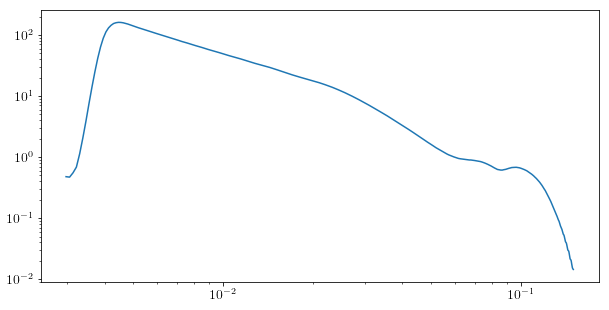

In [74]:
plt.figure(figsize=(10,5))
plt.plot(diff0002.natural_f,diff0002.natural_h_f)
plt.xscale('log')
plt.yscale('log')
plt.show()

### NANOGrav continuous wave sensitivity

In [75]:
#NANOGrav continuous wave sensitivity
NANOGrav_background = 4e-16 # Unsubtracted GWB amplitude: 0,4e-16
NANOGrav_dp = 0.95 #Detection Probablility: 0.95,0.5
NANOGrav_fap = 0.0001 #False Alarm Probability: 0.05,0.003,0.001,0.0001
NANOGrav_Tobs = 15 #Observation years: 15,20,25

NANOGrav_filename = 'cw_simulation_Ared_' + str(NANOGrav_background) + '_dp_' + str(NANOGrav_dp) \
                    + '_fap_' + str(NANOGrav_fap) + '_T_' + str(NANOGrav_Tobs) + '.txt'
NANOGrav_filelocation = NANOGrav_filedirectory + NANOGrav_filename

NANOGrav_Mingarelli_no_GWB = SnN.PTA('NANOGrav_Mingarelli_no_GWB')
NANOGrav_Mingarelli_no_GWB.Load_Data(NANOGrav_filelocation)

In [76]:
#NANOGrav continuous wave sensitivity
NANOGrav_background_2 = 0 # Unsubtracted GWB amplitude: 0,4e-16
NANOGrav_dp_2 = 0.95 #Detection Probablility: 0.95,0.5
NANOGrav_fap_2 = 0.0001 #False Alarm Probability: 0.05,0.003,0.001,0.0001
NANOGrav_Tobs_2 = 15 #Observation years: 15,20,25

NANOGrav_filename_2 = 'cw_simulation_Ared_' + str(NANOGrav_background_2) + '_dp_' + str(NANOGrav_dp_2) \
                    + '_fap_' + str(NANOGrav_fap_2) + '_T_' + str(NANOGrav_Tobs_2) + '.txt'
NANOGrav_filelocation_2 = NANOGrav_filedirectory + NANOGrav_filename_2

NANOGrav_Mingarelli_GWB = SnN.PTA('NANOGrav_Mingarelli_GWB')
NANOGrav_Mingarelli_GWB.Load_Data(NANOGrav_filelocation_2)

### SKA  parameters and methods from arXiv:0804.4476 section 7.1

In [118]:
###############################################
#SKA calculation using parameters and methods from arXiv:0804.4476 section 7.1
sigma_SKA = 10*u.ns.to('s')*u.s #sigma_rms timing residuals in nanoseconds to seconds
T_SKA = 15*u.yr #Observing time in years
N_p_SKA = 20 #Number of pulsars
cadence_SKA = 1/(u.wk.to('yr')*u.yr) #Avg observation cadence of 1 every week in [number/yr]

In [130]:
SKA_Hazboun = SnN.PTA('SKA_Hazboun')
SKA_Hazboun.Default_Setup_Hazboun_2019(T_SKA,N_p_SKA,sigma_SKA,cadence_SKA)

In [135]:
SKA_Moore = SnN.PTA('SKA_Moore')
SKA_Moore.Default_Setup_Moore_2014(T_SKA,N_p_SKA,sigma_SKA,cadence_SKA)

#### Using Jeff's Methods/code https://arxiv.org/abs/1907.04341

### NANOGrav 11.5yr parameters https://arxiv.org/abs/1801.01837

In [120]:
###############################################
#NANOGrav calculation using 11.5yr parameters https://arxiv.org/abs/1801.01837
sigma_nano = 100*u.ns.to('s')*u.s #rms timing residuals in nanoseconds to seconds
T_nano = 15*u.yr #Observing time in years
N_p_nano = 18 #Number of pulsars
cadence_nano = 1/(2*u.wk.to('yr')*u.yr) #Avg observation cadence of 1 every 2 weeks in number/year

In [137]:
NANOGrav_Hazboun = SnN.PTA('NANOGrav Hazboun')
NANOGrav_Hazboun.Default_Setup_Hazboun_2019(T_nano,N_p_nano,sigma_nano,cadence_nano) 

In [142]:
NANOGrav_Moore = SnN.PTA('NANOGrav Moore')
NANOGrav_Moore.Default_Setup_Moore_2014(T_nano,N_p_nano,sigma_nano,cadence_nano) 

8.267195767195766e-07 1 / s
8.267195767195768e-07 1 / s


In [144]:
print(NANOGrav_Moore.h_n_f)

[7.61348560e-21 7.54685331e-21 7.48099198e-21 7.41589388e-21
 7.35155136e-21 7.28795688e-21 7.22510294e-21 7.16298216e-21
 7.10158720e-21 7.04091084e-21 6.98094590e-21 6.92168531e-21
 6.86312206e-21 6.80524921e-21 6.74805990e-21 6.69154737e-21
 6.63570488e-21 6.58052582e-21 6.52600360e-21 6.47213174e-21
 6.41890382e-21 6.36631348e-21 6.31435443e-21 6.26302046e-21
 6.21230542e-21 6.16220323e-21 6.11270787e-21 6.06381338e-21
 6.01551389e-21 5.96780357e-21 5.92067666e-21 5.87412747e-21
 5.82815037e-21 5.78273977e-21 5.73789018e-21 5.69359613e-21
 5.64985224e-21 5.60665318e-21 5.56399367e-21 5.52186849e-21
 5.48027249e-21 5.43920057e-21 5.39864767e-21 5.35860882e-21
 5.31907906e-21 5.28005352e-21 5.24152738e-21 5.20349585e-21
 5.16595422e-21 5.12889782e-21 5.09232202e-21 5.05622227e-21
 5.02059404e-21 4.98543287e-21 4.95073434e-21 4.91649409e-21
 4.88270778e-21 4.84937116e-21 4.81648000e-21 4.78403012e-21
 4.75201740e-21 4.72043774e-21 4.68928711e-21 4.65856151e-21
 4.62825700e-21 4.598369

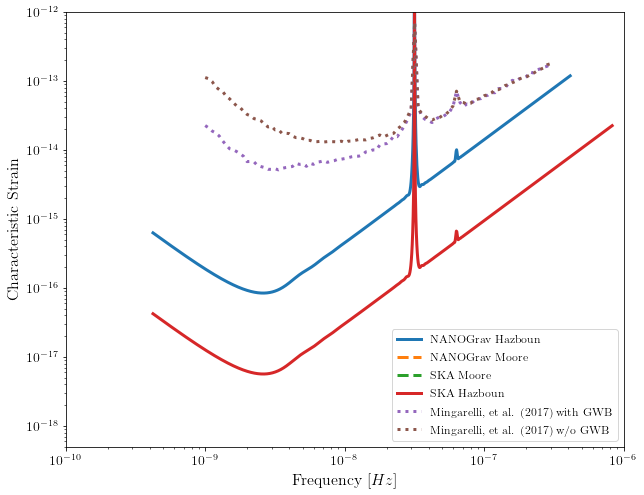

In [139]:
fig = plt.figure(figsize=(10,8))
plt.loglog(NANOGrav_Hazboun.fT,NANOGrav_Hazboun.h_n_f, linewidth = linesize,label = r'NANOGrav Hazboun')
plt.loglog(NANOGrav_Moore.fT,NANOGrav_Moore.h_n_f,linestyle = '--', linewidth = linesize,label = r'NANOGrav Moore')

plt.loglog(SKA_Moore.fT,SKA_Moore.h_n_f,linestyle = '--', linewidth = linesize,label = r'SKA Moore')
plt.loglog(SKA_Hazboun.fT,SKA_Hazboun.h_n_f, linewidth = linesize,label = r'SKA Hazboun')

plt.loglog(NANOGrav_Mingarelli_GWB.fT,NANOGrav_Mingarelli_GWB.h_n_f,linestyle = ':', linewidth = linesize,\
           label = r'Mingarelli, et al. (2017) with GWB')
plt.loglog(NANOGrav_Mingarelli_no_GWB.fT,NANOGrav_Mingarelli_no_GWB.h_n_f,linestyle = ':', linewidth = linesize,\
           label = r'Mingarelli, et al. (2017) w/o GWB')

plt.tick_params(axis = 'both',which = 'major', labelsize = axissize)
plt.ylim([5e-19,1e-12])
plt.xlim([1e-10,1e-6])
#plt.title('NANOGrav (15yr)',fontsize=labelsize)
plt.xlabel(r'Frequency $[Hz]$',fontsize = labelsize)
plt.ylabel('Characteristic Strain',fontsize = labelsize)
plt.legend(loc='lower right', fontsize = 12)

#########################
#Save Figure to File
figname = '/PTA_Char_Strain.pdf'
figloc = fig_save_location+figname
isitsavetime = False
if isitsavetime:
    fig.savefig(figloc, bbox_inches='tight')
    
plt.show()

####################################################################
# Calculate LISA amplitude spectral densities for various models

In [62]:
L = 2.5*u.Gm  #armlength in Gm
L = L.to('m')
LISA_T_obs = 4*u.yr.to('s')*u.s
Ground_T_obs = 4*u.yr.to('s')*u.s

### LISA Calculation from https://arxiv.org/pdf/1702.00786.pdf (Amaro-Seaone 2017)

In [66]:
f_acc_break_low = .4*u.mHz.to('Hz')*u.Hz
f_acc_break_high = 8.*u.mHz.to('Hz')*u.Hz
f_IMS_knee = 2.*u.mHz.to('Hz')*u.Hz
A_acc = 3e-15*u.m/u.s/u.s
A_IMS = 10e-12*u.m

Background = False

ESA_LISA = SnN.SpaceBased('ESA_LISA')
ESA_LISA.Default_Setup(LISA_T_obs,L,A_acc,f_acc_break_low,f_acc_break_high,A_IMS,f_IMS_break,Background)

### Neil Calculation from https://arxiv.org/pdf/1803.01944.pdf

In [67]:
#Neil Calculation from https://arxiv.org/pdf/1803.01944.pdf
f_acc_break_low = .4*u.mHz.to('Hz')*u.Hz
f_acc_break_high = 8.*u.mHz.to('Hz')*u.Hz
f_IMS_knee = 2.*u.mHz.to('Hz')*u.Hz
A_acc = 3e-15*u.m/u.s/u.s
A_IMS = 1.5e-11*u.m
Background = False
    
Neil_LISA = SnN.SpaceBased('Neil_LISA')
Neil_LISA.Default_Setup(LISA_T_obs,L,A_acc,f_acc_break_low,f_acc_break_high,A_IMS,f_IMS_break,Background)

### Plots of Space-Based Detectors

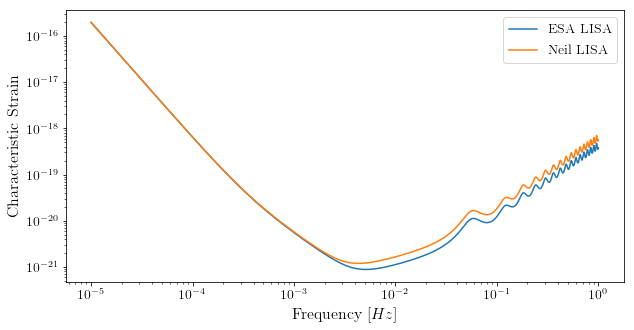

In [69]:
fig = plt.figure(figsize=(10,5))
plt.loglog(ESA_LISA.fT,ESA_LISA.h_n_f,label='ESA LISA')
plt.loglog(Neil_LISA.fT,Neil_LISA.h_n_f,label='Neil LISA')

plt.xlabel(r'Frequency $[Hz]$',fontsize = labelsize)
plt.ylabel('Characteristic Strain',fontsize = labelsize)
plt.legend()
#########################
#Save Figure to File
figname = '/LISA_Char_Strain.pdf'
figloc = fig_save_location+figname
isitsavetime = False
if isitsavetime:
    fig.savefig(figloc, bbox_inches='tight')
    
plt.show()

#######################################################################
# BBH strain calculation

In [84]:
#Vars = [M,q,chi1,chi2,z]
M = [1e6,65.0,1e10]
q = [1.0,18.0,1.0]
x1 = [0.95,0.0,-0.95]
x2 = [0.95,0.0,-0.95]
z = [3.0,0.093,20.0]
inc = 0.0 #Doesn't really work...

Vars1 = [M[0],q[0],x1[0],x2[0],z[0]]
Vars2 = [M[1],q[1],x1[1],x2[1],z[1]]
Vars3 = [M[2],q[2],x1[2],x2[2],z[2]]
Vars4 = [M[1],q[0],x1[1],x2[1],z[1]]

In [91]:
source_1 = SnN.BlackHoleBinary()
source_1.Default_Setup(M[0],q[0],x1[0],x2[0],z[0],inc,ESA_LISA)

In [92]:
source_2 = SnN.BlackHoleBinary()
source_2.Default_Setup(M[1],q[1],x1[1],x2[1],z[1],inc,aLIGO)

In [93]:
source_3 = SnN.BlackHoleBinary()
source_3.Default_Setup(M[2],q[2],x1[2],x2[2],z[2],inc,SKA)

In [94]:
source_4 = SnN.BlackHoleBinary()
source_4.Default_Setup(M[1],q[0],x1[1],x2[1],z[1],inc,ET)

In [111]:
diff0002.Default_Setup(M[1],q[0],z[1])
diff0114.Default_Setup(M[1],q[0],z[1])
diff0178.Default_Setup(M[1],q[0],z[1])
diff0261.Default_Setup(M[1],q[0],z[1])
diff0303.Default_Setup(M[1],q[0],z[1])

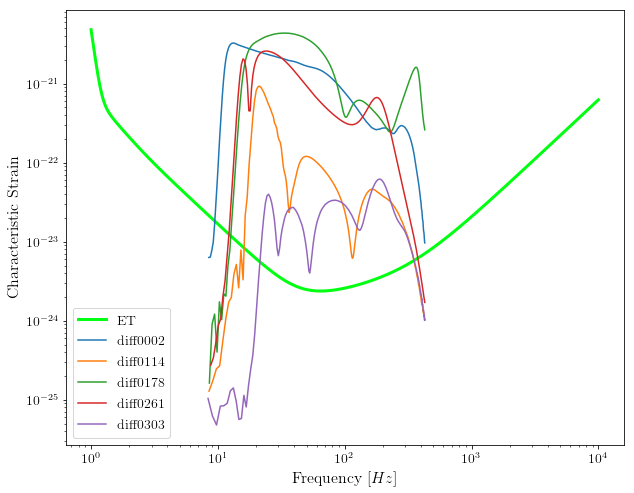

In [115]:
fig,ax = plt.subplots(figsize = figsize)
plt.loglog(ET.fT,ET.h_n_f, linewidth = linesize,color = cm.hsv(colornorm(1.75)),label = 'ET')
plt.loglog(diff0002.f,diff0002.Get_CharStrain(),label = 'diff0002')
plt.loglog(diff0114.f,diff0114.Get_CharStrain(),label = 'diff0114')
plt.loglog(diff0178.f,diff0178.Get_CharStrain(),label = 'diff0178')
plt.loglog(diff0261.f,diff0261.Get_CharStrain(),label = 'diff0261')
plt.loglog(diff0303.f,diff0303.Get_CharStrain(),label = 'diff0303')
plt.xlabel(r'Frequency $[Hz]$',fontsize = labelsize)
plt.ylabel('Characteristic Strain',fontsize = labelsize)
plt.legend()
plt.show()

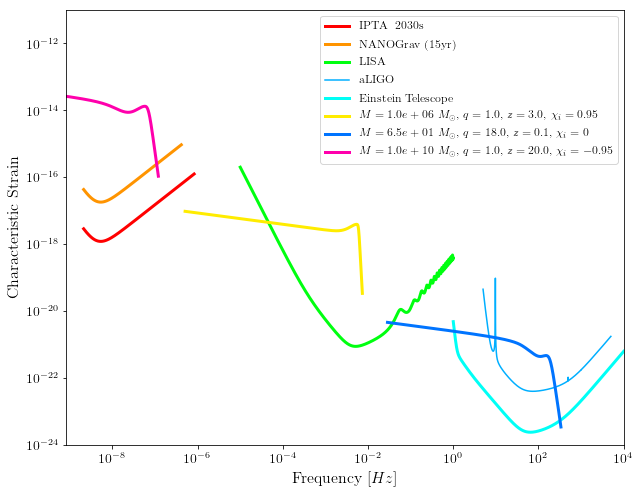

In [116]:
fig,ax = plt.subplots(figsize = figsize)
#plt.loglog(NANOGrav_f,NANOGrav_h_f)
ax.loglog(SKA_no_GWB.fT,SKA_no_GWB.h_n_f, linewidth = linesize,color = cm.hsv(colornorm(0.0)),label = 'IPTA ~2030s')
ax.loglog(NANOGrav_approx_no_GWB.fT,NANOGrav_approx_no_GWB.h_n_f, linewidth = linesize,color = cm.hsv(colornorm(0.5)),label = 'NANOGrav (15yr)')
ax.loglog(ESA_LISA.fT,ESA_LISA.h_n_f, linewidth = linesize,color = cm.hsv(colornorm(1.75)),label = 'LISA')
ax.loglog(aLIGO.fT,aLIGO.h_n_f,color = cm.hsv(colornorm(2.8)),label = 'aLIGO')
ax.loglog(ET.fT,ET.h_n_f, linewidth = linesize,color = cm.hsv(colornorm(2.5)),label = 'Einstein Telescope')
ax.loglog(source_1.f,source_1.Get_CharStrain(), linewidth = linesize,color = cm.hsv(colornorm(0.8)),label = r'$M = %.1e$ $M_{\odot}$, $q = %.1f$, $z = %.1f$, $\chi_{i} = %.2f$' %(M[0],q[0],z[0],x1[0]))
ax.loglog(source_2.f,source_2.Get_CharStrain(), linewidth = linesize,color = cm.hsv(colornorm(3.0)),label = r'$M = %.1e$ $M_{\odot}$, $q = %.1f$, $z = %.1f$, $\chi_{i} = %.0f$' %(M[1],q[1],z[1],x1[1]))
ax.loglog(source_3.f,source_3.Get_CharStrain(), linewidth = linesize,color = cm.hsv(colornorm(4.5)),label = r'$M = %.1e$ $M_{\odot}$, $q = %.1f$, $z = %.1f$, $\chi_{i} = %.2f$' %(M[2],q[2],z[2],x1[2]))
'''ax.scatter(fT[mono_idx_1],h_mono_1)
ax.scatter(ET_f[mono_idx_2],h_mono_2)
ax.scatter(NANOGrav_f[mono_idx_3],h_mono_3)'''


ax.set_xlim([8e-10, 1e4])
ax.set_ylim([1e-24, 1e-11])
ax.tick_params(axis = 'both',which = 'major', labelsize = axissize)

ax.set_xlabel(r'Frequency $[Hz]$',fontsize = labelsize)
ax.set_ylabel('Characteristic Strain',fontsize = labelsize)
ax.legend(loc='upper right', fontsize = legendsize)
plt.show()

In [44]:
#########################
#Save Figure to File
figname = '/Char_Strain_v1.pdf'
figloc = current_path+figname
isitsavetime = False
if isitsavetime:
    fig.savefig(figloc, bbox_inches='tight')